# 4 EDA

5/4/22



- [setup](#setup)
    - [Import libraries](#Import-libraries)
    - [import data](#import-data)

## setup

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import json

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

merged_data_path = '../merged_data/'


### import data

In [4]:
os.listdir(merged_data_path)

['merged_tweets.csv',
 'merged_users.csv',
 'wordle_games.csv',
 'wordle_games.pkl']

In [5]:
#low_memory = False is to deal with mixed column types. check these
tweets = pd.read_csv(merged_data_path + 'merged_tweets.csv', low_memory = False)
users = pd.read_csv(merged_data_path + 'merged_users.csv', low_memory = False)

In [6]:
tweets.set_index('id', inplace = True)
tweets.head(3)

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo,withheld
id,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04 06:06:38+00:00,NaN,NaN,NaN,NaN,NaN
1521733011414257664,1521733011414257664,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04 06:06:37+00:00,NaN,NaN,NaN,NaN,NaN


In [7]:
users.set_index('id', inplace = True)
users.head(3)

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1.006111e+18,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",NaN,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,NaN,NaN,NaN
3.600020e+08,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,NaN,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
8.288181e+17,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,NaN,NaN,NaN


In [8]:
#I want to left-merge onto tweets. Each tweet has user info tacked on. some users will be repeated.
len(tweets), len(users)

(243245, 168362)

In [9]:
#the merged df should have as many records as tweets.

#tweets-users dataframe
tweets['id_tweets_copy'] = tweets.index
tudf = pd.merge(tweets, users, how = 'left', left_on = 'author_id', right_on = 'id', suffixes = ('_tweet', '_user') )
tudf.fillna(0, inplace = True)
tudf.drop_duplicates(subset = 'id_tweets_copy', inplace = True)
tudf.set_index('id_tweets_copy', inplace=True)
tudf.index.rename('tweet_id', inplace = True)
tudf


,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,...,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,...,0,0,0,0,0,0,0,0,0.0,0
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,...,https://t.co/uMfikCmd0I,0,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1521733011414257664,1521733011414257664,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,...,0,0,0,0,0,0,0,0,0.0,0
1521733010504445954,1521733010504445954,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\n\nWordle 319 3/6\n\n⬜🟩⬜🟨⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,...,https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,...,0,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520733413246144512,1520733413246144512,everyone,es,"{'urls': [{'start': 118, 'end': 141, 'url': 'h...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Una de las malditas con montones de posibilida...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2568024265,...,0,0,0,0,0,0,0,0,0.0,0
1520733412725870592,1520733412725870592,everyone,und,"{'hashtags': [{'start': 0, 'end': 7, 'tag': 'W...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#Wordle 316 4/6\r\n\r\n🟨⬛⬛⬛⬛\r\n⬛⬛🟨⬛🟨\r\n⬛⬛⬛⬛🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",91813530,...,https://t.co/s46eDxHM7n,0,https://pbs.twimg.com/profile_images/145343436...,Malta,False,kabo59,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733410947485702,1520733410947485702,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 6/6\r\n\r\n🟨🟩⬛⬛⬛\r\n⬛🟩⬛⬛⬛\r\n⬛🟩⬛⬛⬛c...,"[{'domain': {'id': '30', 'name': 'Entities [En...",19242429,...,https://t.co/p52lELGgR6,Toronto's Favorite Hot Shot / Bon Vivant / Pos...,https://pbs.twimg.com/profile_images/450450271...,Toronto,False,Jeremy__Kay,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0


In [10]:
tudf.iloc[0]['text']

'Wordle (ES)  #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n https://t.co/oJCukg4JnD'

In [11]:
print('\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n')


⬜⬜🟨🟩⬜
⬜⬜🟨🟩⬜
⬜⬜⬜🟩🟩
⬜🟩⬜🟩🟩
🟩🟩🟩🟩🟩



In [12]:
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192115 entries, 1521733018293084160 to 1520733408237916161
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       192115 non-null  int64  
 1   reply_settings        192115 non-null  object 
 2   lang                  192115 non-null  object 
 3   entities_tweet        192115 non-null  object 
 4   possibly_sensitive    192115 non-null  bool   
 5   source                192115 non-null  object 
 6   public_metrics_tweet  192115 non-null  object 
 7   text                  192115 non-null  object 
 8   context_annotations   192115 non-null  object 
 9   author_id             192115 non-null  int64  
 10  created_at            192115 non-null  object 
 11  referenced_tweets     192115 non-null  object 
 12  in_reply_to_user_id   192115 non-null  float64
 13  attachments           192115 non-null  object 
 14  geo                  

In [13]:
tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'entities_tweet',
       'possibly_sensitive', 'source', 'public_metrics_tweet', 'text',
       'context_annotations', 'author_id', 'created_at', 'referenced_tweets',
       'in_reply_to_user_id', 'attachments', 'geo', 'withheld_tweet', 'name',
       'public_metrics_user', 'url', 'description', 'profile_image_url',
       'location', 'protected', 'username', 'verified', 'entities_user',
       'pinned_tweet_id', 'withheld_user'],
      dtype='object')

In [14]:
tudf.iloc[-1]

conversation_id                                       1520733408237916161
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                          0
possibly_sensitive                                                  False
source                                                 Twitter for iPhone
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 0, 'like_c...
text                        Wordle 316 3/6\r\n\r\n⬛⬛🟩⬛⬛\r\n⬛🟩🟩⬛⬛\r\n🟩🟩🟩🟩🟩
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                             1069359838994550785
created_at                                      2022-05-01 11:54:33+00:00
referenced_tweets                                                       0
in_reply_to_user_id                                                   0.0
attachments                           

In [15]:
tudf.iloc[-2]

conversation_id                                       1482287271697170432
reply_settings                                                   everyone
lang                                                                   en
entities_tweet                                                          0
possibly_sensitive                                                  False
source                                                Twitter for Android
public_metrics_tweet    {'retweet_count': 0, 'reply_count': 1, 'like_c...
text                    Wordle (ES)  #115 4/6\r\n\r\n⬜⬜⬜⬜🟩\r\n🟨⬜⬜🟩🟩\r\...
context_annotations     [{'domain': {'id': '30', 'name': 'Entities [En...
author_id                                                      2909723165
created_at                                      2022-05-01 11:54:33+00:00
referenced_tweets       [{'type': 'replied_to', 'id': '152030925309287...
in_reply_to_user_id                                          2909723165.0
attachments                           

In [16]:
tudf.iloc[-1]['withheld_tweet']

0

In [17]:
tudf.iloc[-2]['withheld_tweet']

0

In [18]:
tudf.iloc[-1]['withheld_tweet'] == tudf.iloc[-2]['withheld_tweet']

True

It looks like a lot of the tweets are duplicated because merges and drop_duplicates don't consider NaN == NaN. For example, `tudf.iloc[-1, 'withheld_tweet']` and `tudf.iloc[-2, 'withheld_tweet]` are both null, but they are not considered equal to each other.

In [19]:
#fast and loose fillna for dropping duplicates
tudf.fillna(0, inplace=True)

In [20]:
tudf.drop_duplicates(inplace=True)
tudf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192115 entries, 1521733018293084160 to 1520733408237916161
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   conversation_id       192115 non-null  int64  
 1   reply_settings        192115 non-null  object 
 2   lang                  192115 non-null  object 
 3   entities_tweet        192115 non-null  object 
 4   possibly_sensitive    192115 non-null  bool   
 5   source                192115 non-null  object 
 6   public_metrics_tweet  192115 non-null  object 
 7   text                  192115 non-null  object 
 8   context_annotations   192115 non-null  object 
 9   author_id             192115 non-null  int64  
 10  created_at            192115 non-null  object 
 11  referenced_tweets     192115 non-null  object 
 12  in_reply_to_user_id   192115 non-null  float64
 13  attachments           192115 non-null  object 
 14  geo                  

In [21]:
tudf.tail()

,conversation_id,reply_settings,lang,entities_tweet,possibly_sensitive,source,public_metrics_tweet,text,context_annotations,author_id,...,url,description,profile_image_url,location,protected,username,verified,entities_user,pinned_tweet_id,withheld_user
tweet_id,,,,,,,,,,,,,,,,,,,,,
1520733413246144512,1520733413246144512,everyone,es,"{'urls': [{'start': 118, 'end': 141, 'url': 'h...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Una de las malditas con montones de posibilida...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2568024265,...,0,0,0,0,0,0,0,0,0.0,0
1520733412725870592,1520733412725870592,everyone,und,"{'hashtags': [{'start': 0, 'end': 7, 'tag': 'W...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#Wordle 316 4/6\r\n\r\n🟨⬛⬛⬛⬛\r\n⬛⬛🟨⬛🟨\r\n⬛⬛⬛⬛🟩...,"[{'domain': {'id': '30', 'name': 'Entities [En...",91813530,...,https://t.co/s46eDxHM7n,0,https://pbs.twimg.com/profile_images/145343436...,Malta,False,kabo59,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733410947485702,1520733410947485702,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 6/6\r\n\r\n🟨🟩⬛⬛⬛\r\n⬛🟩⬛⬛⬛\r\n⬛🟩⬛⬛⬛c...,"[{'domain': {'id': '30', 'name': 'Entities [En...",19242429,...,https://t.co/p52lELGgR6,Toronto's Favorite Hot Shot / Bon Vivant / Pos...,https://pbs.twimg.com/profile_images/450450271...,Toronto,False,Jeremy__Kay,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733408607019008,1482287271697170432,everyone,en,0,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",Wordle (ES) #115 4/6\r\n\r\n⬜⬜⬜⬜🟩\r\n🟨⬜⬜🟩🟩\r\...,"[{'domain': {'id': '30', 'name': 'Entities [En...",2909723165,...,https://t.co/p9TNxd7TyP,Diseño de videojuegos \n✨🌻🏞️😊💗☄️✨,https://pbs.twimg.com/profile_images/151907981...,Madrid,False,eliasmgo,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",0.0,0
1520733408237916161,1520733408237916161,everyone,en,0,False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 316 3/6\r\n\r\n⬛⬛🟩⬛⬛\r\n⬛🟩🟩⬛⬛\r\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",1069359838994550785,...,0,0,0,0,0,0,0,0,0.0,0


---
---
## Basic EDA

---
### Language `lang`

A JSON converter for iso language codes to their proper english names was grabbed from [github/haliaeetus iso-639](https://github.com/haliaeetus/iso-639)

In [27]:
with open('../iso_639-1.json', 'r', encoding='utf-8') as lang_file:
    lang_dict = json.load(lang_file)
lang_dict['und'] = {'name':'undefined'}
lang_dict['in'] = {'name':'Indonesian'} #filling in some missing ones
lang_dict['iw'] = {'name':'Hebrew'}

In [28]:
lang_dict['aa']

{'639-1': 'aa',
 '639-2': 'aar',
 'family': 'Afro-Asiatic',
 'name': 'Afar',
 'nativeName': 'Afaraf',
 'wikiUrl': 'https://en.wikipedia.org/wiki/Afar_language'}

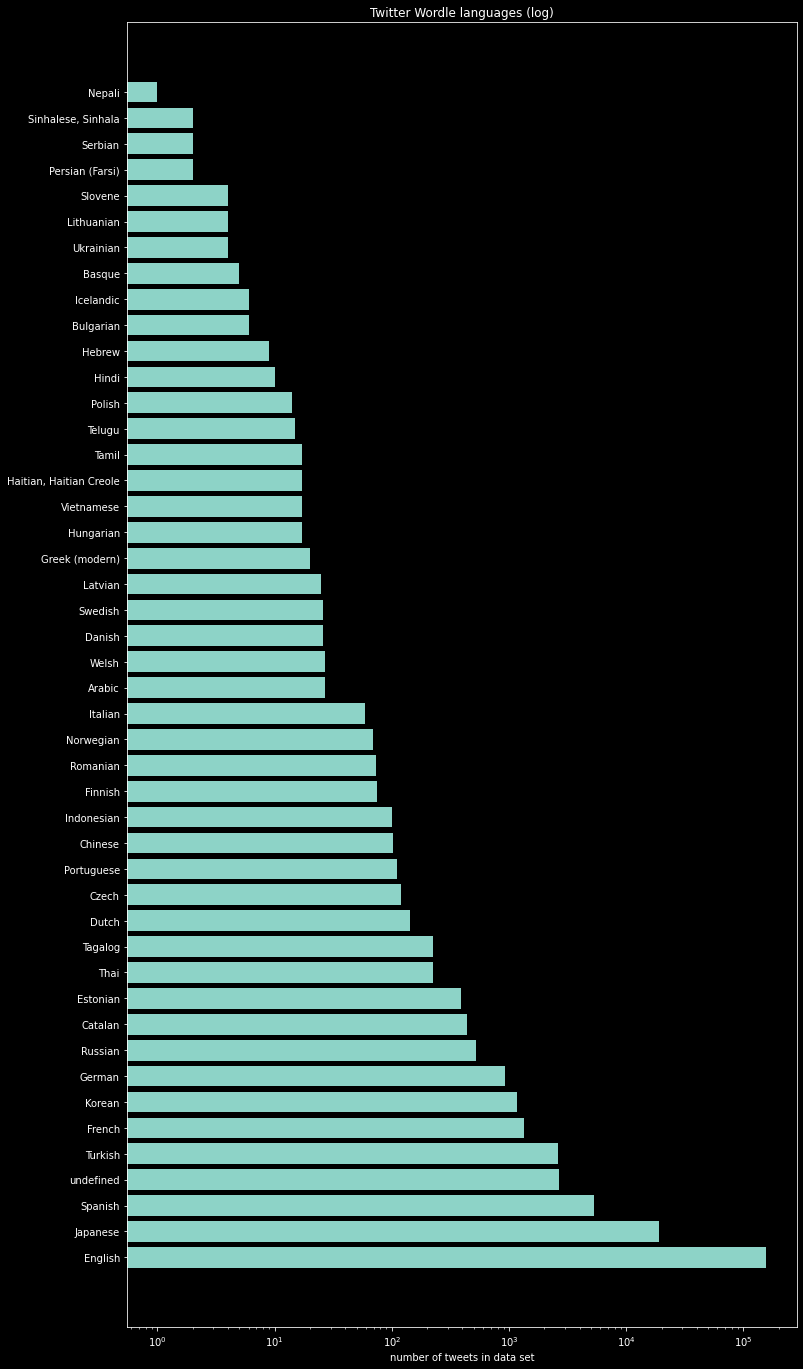

In [29]:
#plot languages
lang_vcs = tudf['lang'].value_counts()
lang_vcs_names = [
     lang_dict[lang]['name']
     for lang in lang_vcs.index
]
plt.figure(figsize=(12,24))
plt.barh(width=lang_vcs, y=lang_vcs_names, log = True)
plt.title('Twitter Wordle languages (log)')
plt.xlabel("number of tweets in data set");

### conversation Id
The `conversation_id` is the id of the "base" tweet. If it's different from the tweet id, then the tweet is a reply somewhere in a thread with the base tweet as the root.

In [30]:
# What tweets have the same conversation id as index (id)?
is_reply = tudf['conversation_id'] != tudf.index
is_reply.sum()

17635

In [31]:
is_reply.sum()/len(tudf)

0.09179397756552066

about 9% of these tweets are in reply to another tweet.

---
###  reply_settings


In [32]:
tudf['reply_settings'].value_counts()

everyone          191306
following            461
mentionedUsers       348
Name: reply_settings, dtype: int64

### entities_tweet

These were `entities` in the tweets data. Entities 

In [33]:
tudf['entities_tweet']

tweet_id
1521733018293084160    {'urls': [{'start': 54, 'end': 77, 'url': 'htt...
1521733015738662913    {'urls': [{'start': 58, 'end': 81, 'url': 'htt...
1521733011414257664                                                    0
1521733010504445954                                                    0
1521733001981444096    {'mentions': [{'start': 0, 'end': 12, 'usernam...
                                             ...                        
1520733413246144512    {'urls': [{'start': 118, 'end': 141, 'url': 'h...
1520733412725870592    {'hashtags': [{'start': 0, 'end': 7, 'tag': 'W...
1520733410947485702                                                    0
1520733408607019008                                                    0
1520733408237916161                                                    0
Name: entities_tweet, Length: 192115, dtype: object

In [34]:
#what are the unique entities?
[
    json.loads(entity.replace("'", '"'))
    for entity in tudf['entities_tweet']
    if type(entity) == str
]

JSONDecodeError: Expecting ',' delimiter: line 1 column 263 (char 262)

In [ ]:
json.loads(tudf.iloc[1]['entities_tweet'].replace("'", '"'))

In [ ]:
ok ="{'urls':[{'start': 58, 'end': 81, 'url': 'https://t.co/ifnVQsE6bO', 'expanded_url': 'https://wordle.danielfrg.com/ciencia/index.html', 'display_url': 'wordle.danielfrg.com/ciencia/index.…', 'images': [{'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=orig', 'width': 1200, 'height': 630}, {'url': 'https://pbs.twimg.com/news_img/1521711979752136704/Qr2DllcV?format=jpg&name=150x150', 'width': 150, 'height': 150}], 'status': 200, 'title': 'Un juego de palabras diario', 'description': 'Adivina la palabra oculta en 6 intentos. Un nuevo puzzle cada día.', 'unwound_url': 'https://wordle.danielfrg.com/ciencia/index.html'}]}"

In [ ]:
json.loads(ok.replace("'", '"'))

# Tweet Rates, time.

In [22]:
tudf['created_at'] = pd.to_datetime(tudf['created_at'])

In [40]:
tudf.sort_values(by = 'created_at', inplace= True)

In [42]:
tudf['wordle_tweet_number'] = range(len(tudf))

In [70]:
tudf['ones'] = np.ones(len(tudf))

In [71]:
time_diff = tudf['created_at'].max() -  tudf['created_at'].min()
time_diff.seconds

21757

In [82]:
tudf['wordle_tweet_rate'] = tudf['ones'][:-1]/list(map(lambda time: time.seconds,np.diff(tudf['created_at'])))

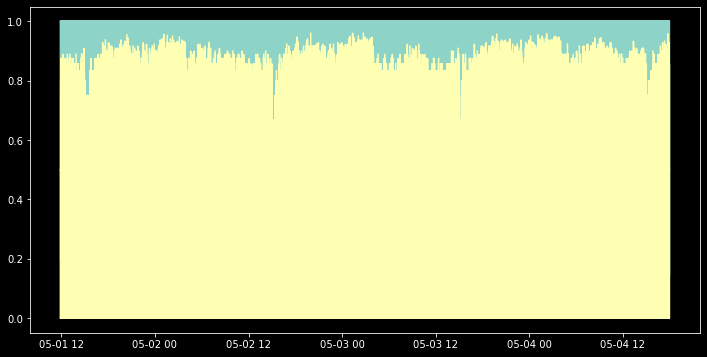

In [84]:
accumulated_tweets = np.linspace(0,len(tudf), len(tudf))
tweet_rate = [
    1/timespan.seconds
    for timespan in np.diff(tudf['created_at'].sort_values(ascending = True))
    if timespan.seconds != 0
]

# plt.figure(figsize = (12,6))
# plt.plot(tudf['created_at'].sort_values(ascending = True)[:-1], tweet_rate)
# # k= 2e7
# # plt.ylim(-k,k)
# plt.show()


plt.figure(figsize = (12,6))
plt.plot(tudf['created_at'], tudf['wordle_tweet_rate'])
plt.show()
plt.plot(tudf['created_at'], tudf['ones'] - tudf['wordle_tweet_rate'])

(0.0, 25.0)

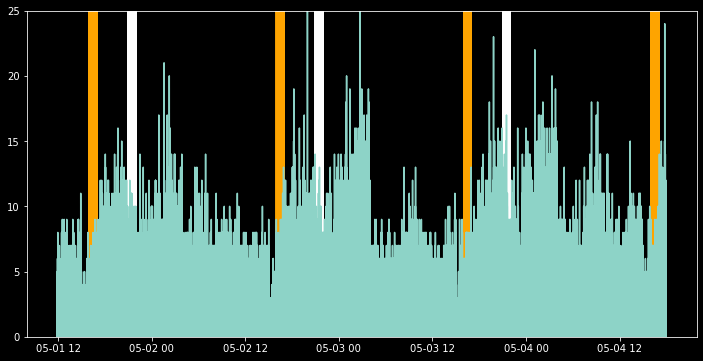

In [102]:
plt.figure(figsize = (12,6))
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'][:-1],np.diff(tudf['created_at'].apply(lambda x: x.second)) )
plt.ylim(0,25)

In [142]:
import datetime as dt

In [149]:
tudf['time_since_last_tweet'] = tudf['created_at'].diff().dt.total_seconds()

In [150]:
tudf['time_since_last_tweet']

tweet_id
1520733408237916161    NaN
1520733408607019008    0.0
1520733410947485702    0.0
1520733414999138310    1.0
1520733412725870592    0.0
                      ... 
1521911808176451586    1.0
1521911810563190785    1.0
1521911819077505026    2.0
1521911830817521664    2.0
1521911829244440577    0.0
Name: time_since_last_tweet, Length: 192115, dtype: float64

(0.0, 25.0)

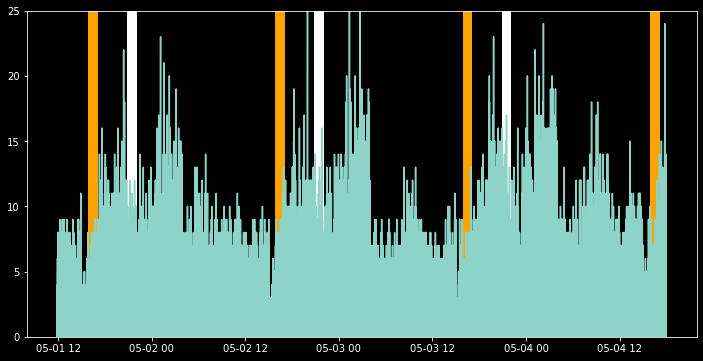

In [154]:
plt.figure(figsize = (12,6))
#make a line at UTC = 9pm, which is 6pm EDT.
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
#make a line at UTC = 4pm, which is noon EDT.
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'],tudf['time_since_last_tweet'] )
plt.ylim(0,25)

In [161]:
tudf['time_since_last_tweet_mean60'] = tudf['time_since_last_tweet'].rolling(60).mean() 

Text(0, 0.5, 'average wait time (s)')

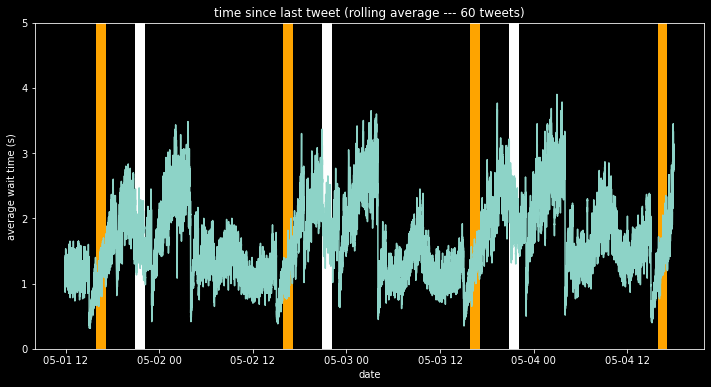

In [160]:
#do the same with rolling averages.
plt.figure(figsize = (12,6))
#make a line at UTC = 9pm, which is 6pm EDT.
for fivepeeem in tudf[tudf['created_at'].apply(lambda x: x.hour == 21)]['created_at']:
    plt.axvline(fivepeeem)
#make a line at UTC = 4pm, which is noon EDT.
for lunchtime in tudf[tudf['created_at'].apply(lambda x: x.hour == 16)]['created_at']:
    plt.axvline(lunchtime, color = 'orange')    
plt.plot(tudf['created_at'],)
plt.ylim(0,5)
plt.title("time since last tweet (rolling average --- 60 tweets)")
plt.xlabel("date")
plt.ylabel("average wait time (s)")

# making the time series regular

The time data is irregular. Follow [this stack overflow](https://stackoverflow.com/questions/25234941/python-regularise-irregular-time-series-with-linear-interpolation) answer to use `traces` to make a regular time series.

> You can do this with traces. First, create a TimeSeries with your irregular measurements like you would a dictionary:
```python
    ts = traces.TimeSeries([
    (datetime(1992, 8, 27, 7, 46, 48), 28.0),
    (datetime(1992, 8, 27, 8, 0, 48), 28.2),
    ...
    (datetime(1992, 8, 27, 9, 3, 48), 30.0),
])
```

Then regularize using the sample method:

```python
    ts.sample(
    sampling_period=timedelta(minutes=15),
    start=datetime(1992, 8, 27, 8),
    end=datetime(1992, 8, 27, 9),
    interpolate='linear',
```
> This results in the following regularized version, where the gray dots are the original data and the orange is the regularized version with linear interpolation.

In [167]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install traces

  Created wheel for infinity: filename=infinity-1.5-py3-none-any.whl size=3095 sha256=070325350b0c9a9d9a2d802960c4c68e6ebf41dd1a24c4531e2697f74b364659
  Stored in directory: c:\users\david\appdata\local\pip\cache\wheels\1e\88\76\5045a7c50b29a2e55ee8a73a8c8d0215f84ee54e9355492d82
Successfully built infinity


[traces is pretty cool](https://traces.readthedocs.io/en/latest/#:~:text=The%20main%20object%20in%20traces,%3A45%3A56am%2C%20etc.&text=What%20if%20you%20want%20to,one%20of%20the%20measurement%20times.). It makes TimeSeries objects that interpolate between the data points by default. You can put any datetime in.

In [191]:
tudf['created_at']

tweet_id
1520733408237916161   2022-05-01 11:54:33+00:00
1520733408607019008   2022-05-01 11:54:33+00:00
1520733410947485702   2022-05-01 11:54:33+00:00
1520733414999138310   2022-05-01 11:54:34+00:00
1520733412725870592   2022-05-01 11:54:34+00:00
                                 ...           
1521911808176451586   2022-05-04 17:57:05+00:00
1521911810563190785   2022-05-04 17:57:06+00:00
1521911819077505026   2022-05-04 17:57:08+00:00
1521911830817521664   2022-05-04 17:57:10+00:00
1521911829244440577   2022-05-04 17:57:10+00:00
Name: created_at, Length: 192115, dtype: datetime64[ns, UTC]

In [200]:
import traces

from datetime import datetime

from dateutil import tz

In [201]:
#make a time series
ts = traces.TimeSeries(
        zip( tudf['created_at'],
            tudf['time_since_last_tweet_mean60']
        )
    )

tudf.iloc[0]['created_at']

Timestamp('2022-05-01 11:54:33+0000', tz='UTC')

In [207]:
#Give the time series tz awareness when making values.

UTC = tz.gettz('UTC')
ts[datetime(2042, 2, 1,  6,  0,  0, tzinfo = UTC)]

2.85

In [218]:
#make a histogram of the time series.
histogram = ts.distribution(
start=tudf['created_at'].min(),
end=tudf['created_at'].max()
)
histogram.median()

1.5333333333333334

In [219]:
histogram.standard_deviation(), histogram.mean(), histogram.max(), histogram.min()

(nan, nan, 3.9, nan)


## seasonal decomposing

I may not be able to do this without some conversion between the `traces` timeseries and however statsmodels works

In [183]:
ts[1]

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [173]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts)

plt.rc('figure', figsize(12,6))
decomp.plot();



TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
tudf['time_since_last_tweet']

In [136]:
tudf['created_at'].apply(lambda x: x.second)

tweet_id
1520733408237916161    33
1520733408607019008    33
1520733410947485702    33
1520733414999138310    34
1520733412725870592    34
                       ..
1521911808176451586     5
1521911810563190785     6
1521911819077505026     8
1521911830817521664    10
1521911829244440577    10
Name: created_at, Length: 192115, dtype: int64

# geo and location

`geo` is a geocode corresponding to a location. They are also called `place_id`. The great majority of tweets do not have a geo code, but perhaps location could be gathered by the user, rather than the tweet itself.

According to [Get information about a place](https://developer.twitter.com/en/docs/twitter-api/v1/geo/place-information/api-reference/get-geo-id-place_id) in the Twitter docs,
> These IDs can be retrieved from geo/reverse_geocode.

`location` is a very general string.

In [85]:

tudf.columns

Index(['conversation_id', 'reply_settings', 'lang', 'entities_tweet',
       'possibly_sensitive', 'source', 'public_metrics_tweet', 'text',
       'context_annotations', 'author_id', 'created_at', 'referenced_tweets',
       'in_reply_to_user_id', 'attachments', 'geo', 'withheld_tweet', 'name',
       'public_metrics_user', 'url', 'description', 'profile_image_url',
       'location', 'protected', 'username', 'verified', 'entities_user',
       'pinned_tweet_id', 'withheld_user', 'wordle_tweet_number',
       'wordle_tweet_rate', 'ones'],
      dtype='object')

In [87]:
tudf['geo'].value_counts()

0                                   189164
{'place_id': '206c436ce43a43a3'}        69
{'place_id': '018f1cde6bad9747'}        46
{'place_id': '3797791ff9c0e4c6'}        32
{'place_id': '0161be1b3f98d6c3'}        27
                                     ...  
{'place_id': '5524b796309058b5'}         1
{'place_id': '534d44fc60f378ec'}         1
{'place_id': '3b19e4995834dd32'}         1
{'place_id': '776bc3a7f14c1999'}         1
{'place_id': '966210afcb797b90'}         1
Name: geo, Length: 1293, dtype: int64

In [103]:
len(tudf)

192115

In [108]:
tudf['location'].value_counts().head(30)

0                              94269
United States                    557
Los Angeles, CA                  450
Chicago, IL                      384
London                           380
日本                               369
India                            355
London, England                  349
Madrid                           323
Canada                           308
España                           282
New York, NY                     277
California, USA                  253
Japan                            253
United Kingdom                   250
Atlanta, GA                      245
England, United Kingdom          241
Tokyo                            241
she/her                          239
UK                               236
Madrid, Comunidad de Madrid      235
USA                              222
Seattle, WA                      221
Argentina                        218
Washington, DC                   215
Buenos Aires, Argentina          215
Toronto, Ontario                 213
A

In [112]:
tudf['entities_user'].iloc[2]

"{'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/p52lELGgR6', 'expanded_url': 'http://leonids.bandcamp.com', 'display_url': 'leonids.bandcamp.com'}]}}"

# User `entities`

I've called them `entities_user` in the merged df.

In [134]:
json_list = tudf['entities_user'].head(100).apply(lambda this_entities: json.loads(this_entities.replace("'", '"')).keys() if type(this_entities) == str else np.nan)

In [135]:
json_list

tweet_id
1520733408237916161                   NaN
1520733408607019008                 (url)
1520733410947485702                 (url)
1520733414999138310                   NaN
1520733412725870592                 (url)
                              ...        
1520733846043570176                 (url)
1520733847096242176                   NaN
1520733851181584385                   NaN
1520733853257809921    (url, description)
1520733853929054208         (description)
Name: entities_user, Length: 100, dtype: object

In [128]:
#the .replace("'", '"')
# must be done to replace single quotes with double quotes. otherwise it's not JSON.
json.loads(tudf['entities_user'].iloc[1].replace("'", '"'))

{'url': {'urls': [{'start': 0,
    'end': 23,
    'url': 'https://t.co/p9TNxd7TyP',
    'expanded_url': 'http://www.instagram.com/eli.azzz/',
    'display_url': 'instagram.com/eli.azzz/'}]}}

In [121]:
json.loads()

AttributeError: 'str' object has no attribute 'read'

In [ ]:
str.replace